In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
data = pd.read_csv(filepath)

# Create a new DataFrame as a copy of the original
new_data = data.copy()

column_name = "EP_Total_HVAC_Power_W"
if column_name in new_data.columns:
    column_exists = True
    # Apply the condition: If Controller_Water_Heating_Mode is 0, set EP_Total_HVAC_Power_W to 0
    new_data.loc[new_data['Controller_Water_Heating_Mode'] == 0, column_name] = 0
else:
    column_exists = False
    columns = new_data.columns.tolist()

column_exists, columns if not column_exists else "Column found and values updated"

# Save the modified DataFrame to a new CSV file
new_data.to_csv("new_data.csv", index=False)

C:\Users\bober\AppData\Local\Temp\ipykernel_6060\1360123164.py:6: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


C:\Users\bober\AppData\Local\Temp\ipykernel_6060\3478668317.py:6: DtypeWarning: Columns (26,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filepath)


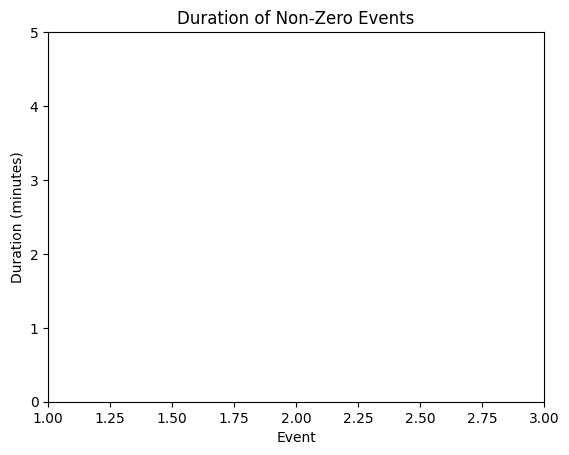

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filepath = 'https://raw.githubusercontent.com/JadenFaste/WCECVillaraEventHistogram/main/Test%20data.csv'
data = pd.read_csv(filepath)

# Convert "Date" column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Create a new DataFrame as a copy of the original
new_data = data.copy()

column_name = "EP_Total_HVAC_Power_W"
if column_name in new_data.columns:
    column_exists = True
    # Apply the condition: If Controller_Water_Heating_Mode is 0, set EP_Total_HVAC_Power_W to 0
    new_data.loc[new_data['Controller_Water_Heating_Mode'] == 0, column_name] = 0
else:
    column_exists = False
    columns = new_data.columns.tolist()

new_data['Duration'] = new_data['Date'].shift(-1) - new_data['Date']
new_data['Duration'] = new_data['Duration'].dt.total_seconds().div(60)  # Convert to minutes

# Handle the initial NaN in Duration
new_data['Duration'].fillna(0, inplace=True)

# Initialize variables
duration_sum = 0
event_durations = []

# Loop through the DataFrame
for i in range(len(new_data) - 1):
    # If the current value of EP_Total_HVAC_Power_W is non-zero
    if new_data.loc[i, column_name] > 0:
        # Add the duration to the sum
        duration_sum += new_data.loc[i, 'Duration']
        # If the next value of EP_Total_HVAC_Power_W is zero or it's the last data point
        if new_data.loc[i + 1, column_name] == 0:
            # Add the sum to the list and reset the sum
            event_durations.append(duration_sum)
            duration_sum = 0

# Handle the last data point if it's part of an "on" event
if new_data.loc[len(new_data) - 1, column_name] > 0:
    duration_sum += new_data.loc[len(new_data) - 1, 'Duration']
    event_durations.append(duration_sum)

# Create a histogram
plt.hist(event_durations, bins=range(0, int(max(event_durations)) + 5, 5))
plt.xlabel('Event')
plt.ylabel('Duration (minutes)')
plt.title('Duration of Non-Zero Events')

# Set the limits of the x-axis and y-axis
plt.xlim([1, 3])  # replace xmin and xmax with the desired values
plt.ylim([0, 5])  # replace ymin and ymax with the desired values

plt.show()